In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data_clean.csv", encoding='utf-8')

In [3]:
df.head(2).transpose()

,0,1
age,41.00,23.000
sex,0.00,0.000
on thyroxine,0.00,0.000
query on thyroxine,0.00,0.000
on antithyroid medication,0.00,0.000
sick,0.00,0.000
pregnant,0.00,0.000
thyroid surgery,0.00,0.000
I131 treatment,0.00,0.000
query hypothyroid,0.00,0.000


In [4]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'referral source', 'classes'],
      dtype='object')

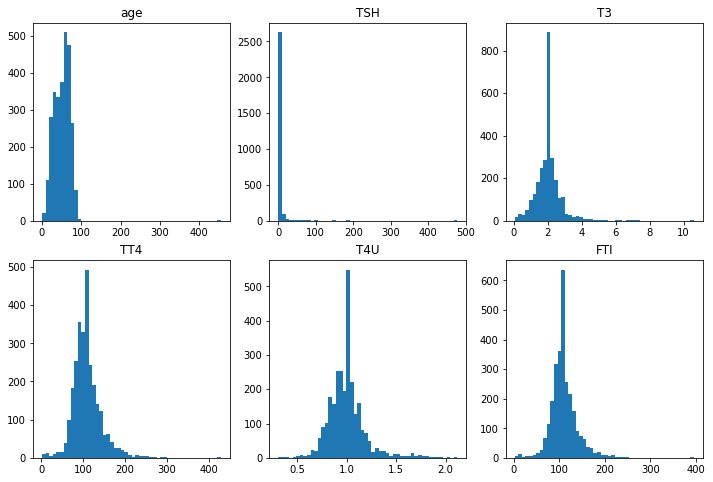

In [5]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize= (12,8))
num_column_list = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i, name in enumerate(num_column_list):
    ax[i//3, i%3].hist(df[name], bins=50)
    ax[i//3, i%3].set_title(name)

In [6]:
# GaussianNB classifier requires data to be normally distributed. TSH has sort of gamma distribution 
# Transformed the data with logarithm.    
df['TSH_ln'] = np.log(df['TSH'])

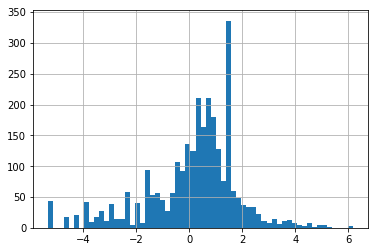

In [7]:
# log(df['TSH_ln']) distributes more close to normal distribution
df['TSH_ln'].hist(bins=60)

In [8]:
df['sex'].unique()

array([ 0.,  1., nan])

In [9]:
df.loc[np.isnan(df["sex"]), 'sex'] = 2

In [10]:
df['sex'].unique()

array([0., 1., 2.])

In [11]:
feature_num = ['age','TSH_ln','T3', 'TT4', 'T4U', 'FTI']

In [12]:
df_num = df[feature_num]

In [13]:
X_num = df_num.values

In [14]:
X_num

array([[ 4.10000000e+01,  2.62364264e-01,  2.50000000e+00,
         1.25000000e+02,  1.14000000e+00,  1.09000000e+02],
       [ 2.30000000e+01,  1.41098697e+00,  2.00000000e+00,
         1.02000000e+02,  9.98000000e-01,  1.10788000e+02],
       [ 4.60000000e+01, -2.02027073e-02,  2.02500000e+00,
         1.09000000e+02,  9.10000000e-01,  1.20000000e+02],
       ...,
       [ 7.50000000e+01,  1.54158725e+00,  2.02500000e+00,
         1.47000000e+02,  8.00000000e-01,  1.83000000e+02],
       [ 6.00000000e+01,  3.36472237e-01,  2.02500000e+00,
         1.00000000e+02,  8.30000000e-01,  1.21000000e+02],
       [ 8.10000000e+01,  1.82321557e-01,  1.50000000e+00,
         1.14000000e+02,  9.90000000e-01,  1.15000000e+02]])

In [15]:
feature_cat = [ 'sex', 'on thyroxine', 'query on thyroxine','on antithyroid medication', 'sick',
               'pregnant', 'thyroid surgery','I131 treatment', 'query hypothyroid', 
               'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 
               'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'referral source',]

In [16]:
df_cat = df[feature_cat]

In [18]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()
df_cat2 = df_cat.apply(label_encoder.fit_transform)

In [20]:
onehot_encoder = OneHotEncoder(sparse=False)
Xcat = onehot_encoder.fit_transform(df_cat2)

/home/jun3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
Xcat.shape

(2800, 46)

In [22]:
X = np.concatenate((X_num, Xcat), axis=1)  

In [23]:
X.shape

(2800, 52)

In [24]:
y = df['classes'].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=101)

In [26]:
X_train.shape

(1876, 52)

In [27]:
y_train.shape

(1876,)

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print("Classification report on  the training data\n\n", classification_report(y_train, y_train_pred))
print('Confusion_matrix\n\n', confusion_matrix(y_train, y_train_pred))

Classification report on  the training data

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1724
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00      1876
   macro avg       1.00      1.00      1.00      1876
weighted avg       1.00      1.00      1.00      1876

Confusion_matrix

 [[1724    0    0    0]
 [   0   40    0    0]
 [   0    0  110    0]
 [   0    0    0    2]]


In [31]:
y_cv_pred = xgb_model.predict(X_cv)

In [32]:
print("Classification report on the cross-validation data\n\n", classification_report(y_cv, y_cv_pred))
print('Confusion_matrix\n\n', confusion_matrix(y_cv, y_cv_pred))

Classification report on the cross-validation data

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924

Confusion_matrix

 [[854   1   1]
 [  1  23   0]
 [  0   0  44]]


{'negative': 0, 'primary hypothyroid': 1,
      'compensated hypothyroid':2, 'secondary hypothyroid': 3}

In [33]:
import pickle

In [34]:
from sklearn.externals import joblib
joblib.dump(xgb_model, 'XGBoost_model.pkl')

['XGBoost_model.pkl']

In [35]:
df_test = pd.read_csv('data_test_clean.csv')

In [36]:
df_test.head(2)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,classes
0,35.0,0.0,0,0,0,0,0,0,0,0,...,0,2.025,0,109.072,0,0.998,0,110.788,0,0
1,63.0,1.0,0,0,0,0,0,0,0,0,...,1,2.500,1,108.000,1,0.960,1,113.000,1,0


In [37]:
df_test['TSH_ln'] = np.log(df_test['TSH'])
# log Transforms the data into more like normal distribution

Text(0.5, 1.0, 'TSH_ln')

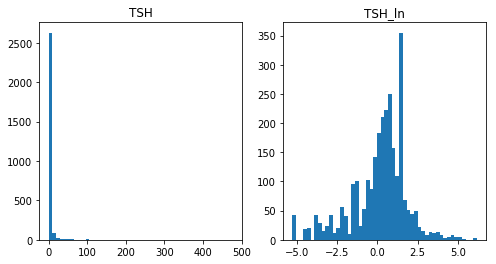

In [38]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize= (8,4))
ax[0].hist(df['TSH'], bins=50)
ax[0].set_title('TSH')
ax[1].hist(df['TSH_ln'], bins=50)
ax[1].set_title('TSH_ln')

In [39]:
df_test_num = df_test[['age','TSH_ln','T3', 'TT4', 'T4U', 'FTI']]
y_test = df_test['classes']

In [40]:
df_test.loc[np.isnan(df_test["sex"]), 'sex'] = 2

In [41]:
df_test_cat = df_test[feature_cat]

In [42]:
df_test_cat.shape

(972, 21)

In [43]:
df_test_cat2 = df_test_cat.apply(label_encoder.transform)

In [44]:
df_test_cat2.shape

(972, 21)

In [45]:
X_test_cat = onehot_encoder.transform(df_test_cat2)

In [46]:
X_test_cat.shape

(972, 46)

In [48]:
X_test_num = df_test_num.values

In [49]:
X_test = np.concatenate((X_test_num, X_test_cat), axis=1)  

In [50]:
y_test_pred = xgb_model.predict(X_test)

In [51]:
print("Classification report on the test data\n\n", classification_report(y_test, y_test_pred))
print('Confusion_matrix\n\n', confusion_matrix(y_test, y_test_pred))

Classification report on the test data

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       0.97      0.94      0.95        31
           2       0.95      1.00      0.98        40

   micro avg       1.00      1.00      1.00       972
   macro avg       0.97      0.98      0.97       972
weighted avg       1.00      1.00      1.00       972

Confusion_matrix

 [[899   1   1]
 [  1  29   1]
 [  0   0  40]]


In [52]:
print("Classification report on the cross-validation data\n\n", classification_report(y_cv, y_cv_pred))
print('Confusion_matrix\n\n', confusion_matrix(y_cv, y_cv_pred))

Classification report on the cross-validation data

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       0.96      0.96      0.96        24
           2       0.98      1.00      0.99        44

   micro avg       1.00      1.00      1.00       924
   macro avg       0.98      0.99      0.98       924
weighted avg       1.00      1.00      1.00       924

Confusion_matrix

 [[854   1   1]
 [  1  23   0]
 [  0   0  44]]


In [53]:
def classification_report_df(report_in):
    rep = report_in.split('\n')
    column_names = ['class']
    report_out =[]
    for i in rep[0].split():
        column_names.append(i)
    for row in rep[2:6]:
        report_out.append(row.split())
    if rep[6]!='':
        report_out.append(rep[6].split('      '))
    elif rep[6]=='' and rep[7]!='':
        report_out.append(rep[7].split('      '))
        
    report_df = pd.DataFrame(report_out)
    report_df.columns = column_names
    return report_df 

def f1_score_class_1_2(df, i=1):
    return (df.loc[i,"f1-score"]*df.loc[i,"support"]+df.loc[i+1,"f1-score"]*df.loc[i+1,"support"])/(df.loc[i,"support"]+df.loc[i+1,"support"])  

In [54]:
xgb_report = classification_report(y_test, y_test_pred)

In [55]:
df_xgb_report = classification_report_df(xgb_report)

In [56]:
df_xgb_report

,class,precision,recall,f1-score,support
0,0,1.00,1.00,1.00,901
1,1,0.97,0.94,0.95,31
2,2,0.95,1.00,0.98,40
3,None,None,None,None,None
4,micro avg,1.00,1.00,1.00,972


In [57]:
df_xgb_report.to_csv("XGBoost classification on test data.csv",index=False)

In [58]:
xgb = pd.read_csv("XGBoost classification on test data.csv")

In [59]:
xgb

,class,precision,recall,f1-score,support
0,0,1.00,1.00,1.00,901.0
1,1,0.97,0.94,0.95,31.0
2,2,0.95,1.00,0.98,40.0
3,NaN,NaN,NaN,NaN,NaN
4,micro avg,1.00,1.00,1.00,972.0


In [61]:
f1_score_class_1_2(xgb, i=1)

0.9669014084507043